In [1]:
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K 
import autokeras as ak
from tensorflow import keras
import tensorflow as tf
import cv2
import glob
import numpy as np
import os
import pandas as pd

In [2]:
img_width, img_height = 128, 128

In [3]:
train_data_dir = 'chest-xray/train'
validation_data_dir = 'chest-xray/test'
nb_train_samples =3000 
nb_validation_samples = 150
epochs = 30
batch_size = 3000

In [4]:
if K.image_data_format() == 'channels_first': 
    input_shape = (3, img_width, img_height) 
else: 
    input_shape = (img_width, img_height, 3) 

In [5]:
train_datagen = ImageDataGenerator( 
                rescale = 1. / 255, 
                 shear_range = 0.2, 
                  zoom_range = 0.2, 
            horizontal_flip = True) 
  
test_datagen = ImageDataGenerator(rescale = 1. / 255) 
  
train_generator = train_datagen.flow_from_directory(train_data_dir, 
                              target_size =(img_width, img_height), 
                     batch_size = batch_size, class_mode ='binary') 
  
validation_generator = test_datagen.flow_from_directory( 
                                    validation_data_dir, 
                   target_size =(img_width, img_height), 
          batch_size = batch_size, class_mode ='binary') 

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


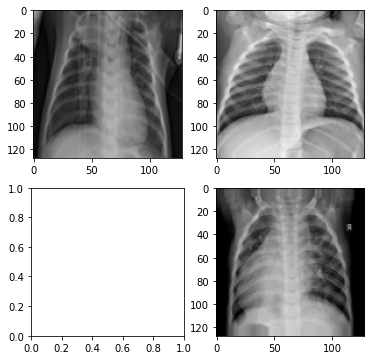

In [6]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(2,2,figsize=(6,6))

images,labels = train_generator.next()
x=0
y=0
for i in range(0,16):
    image = images[i]
    if y<2 and x<2:
        ax[y][x].imshow(image)
    if x>2:
        y=y+1
        x=0
    x=x+1
plt.show()

In [7]:
import tensorflow as tf

import autokeras as ak

images,labels = train_generator.next()
print(labels)

#train_set = tf.data.Dataset.from_tensor_slices(((x_train,), (x_test,)))
# Initialize the image classifier.
clf = ak.ImageClassifier(
    overwrite=True,
    max_trials=2)

# Feed the image classifier with training data.
clf.fit(images,labels, validation_split=0.1 , epochs=10)

Trial 2 Complete [00h 43m 48s]
val_loss: 0.696735680103302

Best val_loss So Far: 0.2639840245246887
Total elapsed time: 00h 48m 29s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
70/70 [==============================] - 29s 408ms/step - loss: 0.5614 - accuracy: 0.8023
Epoch 2/10
70/70 [==============================] - 29s 409ms/step - loss: 0.2369 - accuracy: 0.9070
Epoch 3/10
70/70 [==============================] - 29s 408ms/step - loss: 0.1836 - accuracy: 0.9278
Epoch 4/10
70/70 [==============================] - 29s 409ms/step - loss: 0.1214 - accuracy: 0.9549
Epoch 5/10
70/70 [==============================] - 29s 408ms/step - loss: 0.1010 - accuracy: 0.9621
Epoch 6/10
70/70 [==============================] - 29s 409ms/step - loss: 0.0551 - accuracy: 0.9788
Epoch 7/10
70/70 [==============================] - 29s 410ms/step - loss: 0.0424 - accuracy: 0.9860
Epoch 8/10
70/70 [==============================] - 29s 409ms/step - loss: 0.0322 - accuracy: 0.9883
Epoch 9/10
70/70 [===

In [8]:
x_test,y_test=validation_generator.next()
predicted_y = clf.predict(x_test)
print(predicted_y)

[[1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.

In [9]:
print(clf.evaluate(x_test, y_test))

20/20 [==============================] - 1s 61ms/step - loss: 0.5090 - accuracy: 0.8766
[0.5090194940567017, 0.8766025900840759]


In [10]:
model = clf.export_model()

In [11]:
#model.save("model_autokeras_chest_xray1.h5")

In [12]:
print(type(model))  # <class 'tensorflow.python.keras.engine.training.Model'>

try:
    model.save("model_autokeras_chest_xray1", save_format="tf")
except:
    model.save("model_autokeras_chest_xray1.h5")

from tensorflow.keras.models import load_model

loaded_model = load_model("model_autokeras_chest_xray1", custom_objects=ak.CUSTOM_OBJECTS)

predicted_y = loaded_model.predict(tf.expand_dims(x_test, -1))
print(predicted_y)

<class 'tensorflow.python.keras.engine.functional.Functional'>
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model_autokeras_chest_xray1/assets
[[9.99984801e-01]
 [9.26249146e-01]
 [9.97954130e-01]
 [7.42516931e-05]
 [7.87666857e-01]
 [9.99635160e-01]
 [9.99996424e-01]
 [7.34679699e-02]
 [2.01866031e-03]
 [3.70829105e-02]
 [9.99876499e-01]
 [9.99998450e-01]
 [3.05621654e-01]
 [9.95505571e-01]
 [2.56954085e-08]
 [9.99996066e-01]
 [1.00000000e+00]
 [4.13879931e-01]
 [9.99606490e-01]
 [1.00000000e+00]
 [1.04063749e-03]
 [9.99695539e-01]
 [9.99515474e-01]
 [9.65302050e-01]
 [9.99661207e-01]
 [4.19375271e-01]
 [3.28374416e-01]
 [9.99163151e-01]
 [9.81438756e-01]
 [9.79495406e-01]
 [9.99991238e-01]
 [9.99999285e-01]
 [3.96899164e-01]
 [9.06285644e-03]
 [4.11641657e-01]
 [9